<a href="https://colab.research.google.com/github/Mahsalo/BasicML/blob/main/Implementing_ConV_Pooling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import cv2
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
###Importing an image fromt he misc library
i = misc.ascent()

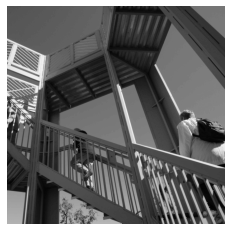

In [7]:
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

In [11]:
##Creating a 3*3 filter
##Blurring filter
filter1 = [[0,2,0],[2,2,2],[0,2,0]]
##Gaussian Blurring
filter2 = [[1,2,1],[2,4,2],[1,2,1]]
##Motion Blurring
filter3 = [[1,0,0],[0,1,0],[0,0,1]]
##Random filter
filter4 = [[-1,-2,-1],[0,0,0],[1,2,1]]

In [26]:
### Start from 1 to ignore the borders
def filtering(X,F):
  size_x = X.shape[0]
  size_y = X.shape[1]
  Res = np.zeros((size_x,size_y))
  if np.sum(F) !=0:
    F = F/np.sum(F)
  for i1 in range(1,size_x-1):
    for i2 in range(1,size_y-1):
        conv = 0
        conv = conv + F[0][0]*X[i1-1,i2-1]
        conv = conv + F[0][1]*X[i1,i2-1]
        conv = conv + F[0][2]*X[i1+1,i2-1]

        conv = conv + F[1][0]*X[i1-1,i2]
        conv = conv + F[1][1]*X[i1,i2]
        conv = conv + F[1][2]*X[i1+1,i2]

        conv = conv + F[2][0]*X[i1-1,i2+1]
        conv = conv + F[2][1]*X[i1,i2+1]
        conv = conv + F[2][2]*X[i1+1,i2+1]

        if conv > 255:
          conv = 255
        if conv < 0:
          conv = 0  
        Res[i1,i2]=conv
  return Res        

Filter1
1.0


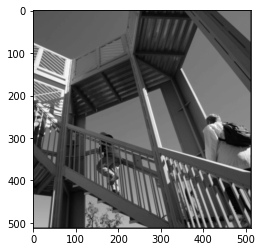

In [29]:
print('Filter1')
plt.imshow(filtering(i,filter1))


Filter2
1.0


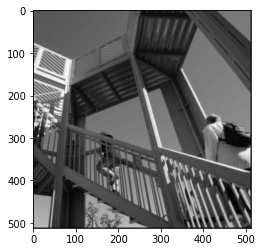

In [30]:
print('Filter2')
plt.imshow(filtering(i,filter2))

Filter3
1.0


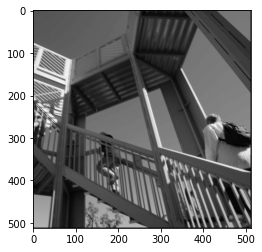

In [31]:
print('Filter3')
plt.imshow(filtering(i,filter3))

Filter4
0


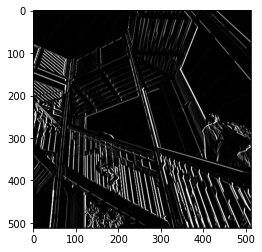

In [32]:
print('Filter4')
plt.imshow(filtering(i,filter4))

(256, 256)


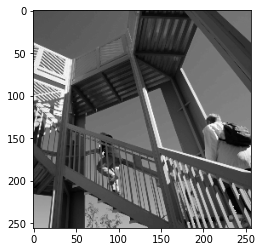

In [36]:
### Implementing MaxPooling
newImg = np.zeros((int(np.ceil(size_x/2)),int(np.ceil(size_y/2))))
for j1 in range(0,size_x,2):
  for j2 in range(0,size_y,2):
    pixels = []
    pixels.append(i[j1,j2])
    pixels.append(i[j1+1,j2])
    pixels.append(i[j1,j2+1])
    pixels.append(i[j1+1,j2+1])
    maxx = np.max(pixels)
    newImg[int(j1/2),int(j2/2)] = maxx

plt.imshow(newImg)    
print(newImg.shape)